In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import sympy 
from sympy import banded, ones, Matrix, symbols, sqrt, print_latex, oo
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.special import wofz 

In [3]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

## Asymmetrically Weighted Hermite Linear Response Function

In [4]:
# number of moments
Nv = 7

In [5]:
# symbolic variables
xi = symbols('xi') 
k = symbols('k', integer = True)

In [7]:
# advection matrix (off-diagonal)
vec = sympy.zeros(Nv)
for jj in range(1, Nv+1):
    vec[jj-1] = sympy.sqrt(jj)/ (sympy.sqrt(2))

In [8]:
# create advection tri-diagonal matrix
A = banded({1: tuple(vec[0, :-1]), -1: tuple(vec[0, :-1])})

In [9]:
A

Matrix([
[        0, sqrt(2)/2,         0,         0,          0,          0,       0],
[sqrt(2)/2,         0,         1,         0,          0,          0,       0],
[        0,         1,         0, sqrt(6)/2,          0,          0,       0],
[        0,         0, sqrt(6)/2,         0,    sqrt(2),          0,       0],
[        0,         0,         0,   sqrt(2),          0, sqrt(10)/2,       0],
[        0,         0,         0,         0, sqrt(10)/2,          0, sqrt(3)],
[        0,         0,         0,         0,          0,    sqrt(3),       0]])

In [11]:
# idenitity matrix
I = np.eye(Nv, dtype=int)

In [12]:
# invert matrix
M = sympy.Matrix(I*xi - k/np.abs(k) * A)

In [13]:
# get final response function 
R_approx = sympy.simplify(sympy.simplify(M.inv()[0, 1]/sympy.sqrt(2)) * k / np.abs(k))

In [14]:
# print 
R_approx

(4*xi**4 - 36*xi**2 + 57)/(8*xi**6 - 84*xi**4 + 210*xi**2 - 105)

In [16]:
# latex code
print_latex(R_approx)

\frac{4 \xi^{4} - 36 \xi^{2} + 57}{8 \xi^{6} - 84 \xi^{4} + 210 \xi^{2} - 105}


## Asymptotic Expansion

### Adiabatic limit $\xi \to 0$

In [20]:
asymptotics_0 = R_approx.series(xi, 0, 6)

In [21]:
asymptotics_0

-19/35 - 26*xi**2/35 - 572*xi**4/525 + O(xi**6)

In [22]:
print_latex(asymptotics_0)

- \frac{19}{35} - \frac{26 \xi^{2}}{35} - \frac{572 \xi^{4}}{525} + O\left(\xi^{6}\right)


### Fluid (cold plasma) limit $\xi \to \infty$

In [23]:
asymptotics_inf = R_approx.series(xi, oo, 16)

In [24]:
asymptotics_inf

130095/(128*xi**14) + 10395/(64*xi**12) + 945/(32*xi**10) + 105/(16*xi**8) + 15/(8*xi**6) + 3/(4*xi**4) + 1/(2*xi**2) + O(xi**(-16), (xi, oo))

In [25]:
print_latex(asymptotics_inf)

\frac{130095}{128 \xi^{14}} + \frac{10395}{64 \xi^{12}} + \frac{945}{32 \xi^{10}} + \frac{105}{16 \xi^{8}} + \frac{15}{8 \xi^{6}} + \frac{3}{4 \xi^{4}} + \frac{1}{2 \xi^{2}} + O\left(\frac{1}{\xi^{16}}; \xi\rightarrow \infty\right)


## Comparison with Hammett-Perkins 1990's approximation

In [26]:
def Z_fun(z):
    return 1j*np.sqrt(np.pi)*wofz(z)

def R(xi):
    return -(1 + xi*Z_fun(xi))

def RHP3(xi):
    return (1j*xi -2/np.sqrt(np.pi))/(2/np.sqrt(np.pi) - 1j*3*xi - (4/np.sqrt(np.pi))*(xi**2) + 2j*(xi**3))

def RHP4(xi):
    return (-4 +2j*np.sqrt(np.pi)*xi + (3*np.pi -8)*(xi**2))/(4 - 6j*np.sqrt(np.pi)*xi - (9*np.pi -16)*(xi**2) + 4j*np.sqrt(np.pi)* (xi**3) + 2*(3*np.pi - 8)*(xi**4))

def R3(xi):
    return 1/(2*(xi**2) - 3)

def R4(xi):
    return (2*(xi**2) - 3)/(4*(xi**4) - 12*(xi**2) + 3)

def R5(xi):
    return (2*(xi**2) - 7)/(4*(xi**4) - 20*(xi**2) + 15)

def R6(xi):
    return (4*(xi**4) - 24*(xi**2) + 15)/(8*(xi**6) - 60*(xi**4) + 90*(xi**2) - 15)

def R7(xi):
    return (4*(xi**4) - 36*(xi**2) + 57)/(8*(xi**6) - 84*(xi**4) + 210*(xi**2) - 105)

In [27]:
# define the xi along the real axis 
xi = 10**np.linspace(-2, 2, int(1e5))

In [28]:
R_3 = R3(xi)
R_HP3 = RHP3(xi)
R_HP4 = RHP4(xi)
R_4 = R4(xi)
R_5 = R5(xi)
R_6 = R6(xi)
R_true = R(xi)

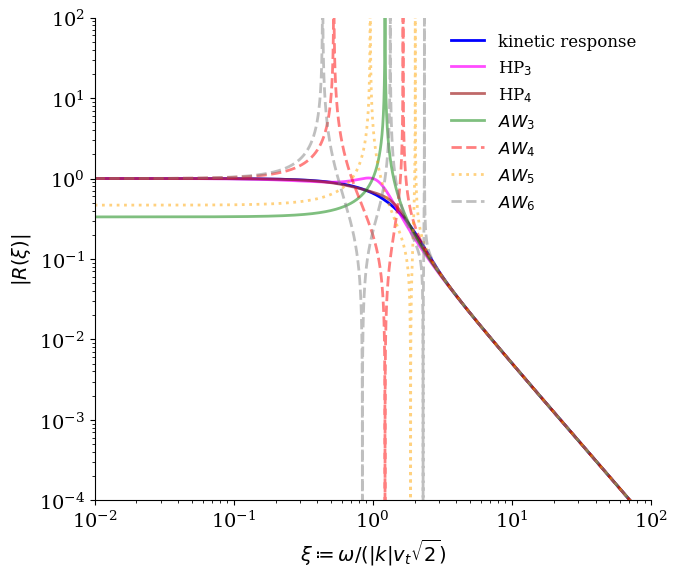

In [29]:
fig, ax = plt.subplots(figsize=(7, 6))

ax.plot(xi, np.abs(R_true), label=r"kinetic response", c="blue", linewidth=2)
ax.plot(xi, np.abs(R_HP3), label=r"HP$_{3}$", c="magenta", linewidth=2, alpha=0.7)
ax.plot(xi, np.abs(R_HP4), label=r"HP$_{4}$", c="brown", linewidth=2, alpha=0.7)
ax.plot(xi, np.abs(R_3), label=r"$AW_{3}$", c="green", ls="-", linewidth=2, alpha=0.5)
ax.plot(xi, np.abs(R_4), label=r"$AW_{4}$", c="red", ls="--", linewidth=2, alpha=0.5)
ax.plot(xi, np.abs(R_5), label=r"$AW_{5}$", c="orange", ls=":", linewidth=2, alpha=0.5)
ax.plot(xi, np.abs(R_6), label=r"$AW_{6}$", c="grey", ls="--", linewidth=2, alpha=0.5)
ax.set_ylim(10**-4, 10**2)
ax.set_yscale("log")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r"$|R(\xi)|$")
ax.set_xlabel(r"$\xi \coloneq \omega/(|k|v_{t} \sqrt{2})$")
ax.set_xscale("log")
ax.set_xlim(1e-2, 1e2)
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='upper right')
legend.get_frame().set_alpha(0)
plt.tight_layout()
plt.savefig("figs/symbolic_response_function_AW.png", dpi=300)

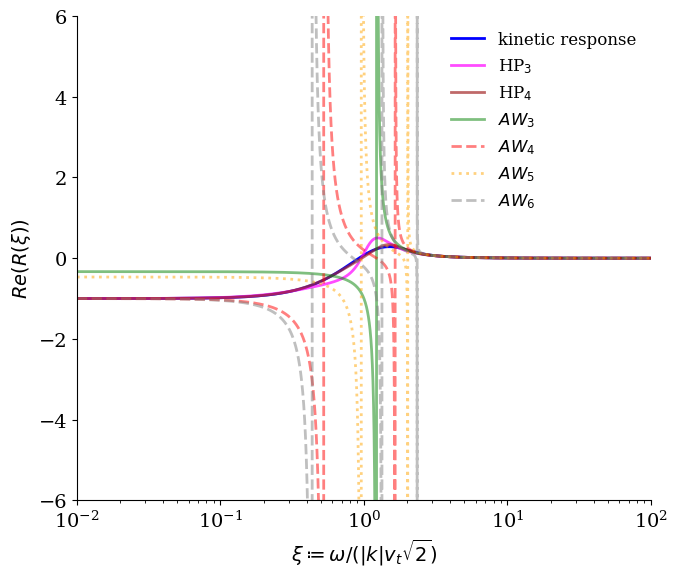

In [30]:
fig, ax = plt.subplots(figsize=(7, 6))

ax.plot(xi, np.real(R_true), label=r"kinetic response", c="blue", linewidth=2)
ax.plot(xi, np.real(R_HP3), label=r"HP$_{3}$", c="magenta", linewidth=2, alpha=0.7)
ax.plot(xi, np.real(R_HP4), label=r"HP$_{4}$", c="brown", linewidth=2, alpha=0.7)
ax.plot(xi, np.real(R_3), label=r"$AW_{3}$", c="green", ls="-", linewidth=2, alpha=0.5)
ax.plot(xi, np.real(R_4), label=r"$AW_{4}$", c="red", ls="--", linewidth=2, alpha=0.5)
ax.plot(xi, np.real(R_5), label=r"$AW_{5}$", c="orange", ls=":", linewidth=2, alpha=0.5)
ax.plot(xi, np.real(R_6), label=r"$AW_{6}$", c="grey", ls="--", linewidth=2, alpha=0.5)

ax.set_ylim(-6, 6)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel(r"$Re(R(\xi))$")
ax.set_xlabel(r"$\xi \coloneq \omega/(|k|v_{t} \sqrt{2})$")
ax.set_xscale("log")
ax.set_xlim(1e-2, 1e2)
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='upper right')
legend.get_frame().set_alpha(0)
plt.tight_layout()
plt.savefig("figs/symbolic_response_function_real_AW.png", dpi=300)

# Landau Damping

In [24]:
# Despersion relation
def disp_k(xi, k=1):
    return k**2 - R(xi=xi/np.sqrt(2))

# Despersion relation
def disp_k_hp3(xi, k=1):
    return k**2 - RHP3(xi=xi/np.sqrt(2))

# Despersion relation
def disp_k_hp4(xi, k=1):
    return k**2 - RHP4(xi=xi/np.sqrt(2))

# Despersion relation
def disp_k_20(xi, k=1):
    return k**2 - R20(xi=xi/np.sqrt(2))

In [25]:
k_vector = np.linspace(0.2, 1, 120)
damping_vector = np.zeros(len(k_vector), dtype="complex128")
damping_vector_hp3 = np.zeros(len(k_vector), dtype="complex128")
damping_vector_hp4 = np.zeros(len(k_vector), dtype="complex128")
damping_vector_20 = np.zeros(len(k_vector), dtype="complex128")

In [ ]:
for ii, kk in enumerate(k_vector):
    damping_vector[ii] = scipy.optimize.newton(lambda xi: disp_k(xi=xi, k=kk), 1.4 - 0.81j*kk, maxiter=1000)
    # plt.scatter(kk, np.abs(disp_k(xi=damping_vector[ii], k=kk)))
    try:
        damping_vector_20[ii] = scipy.optimize.newton(lambda xi: disp_k_20(xi=xi, k=kk), 2.1 - 0.2j*kk, maxiter=1000)
        damping_vector_hp3[ii] = scipy.optimize.newton(lambda xi: disp_k_hp3(xi=xi, k=kk), 2.1 - 0.2j*kk, maxiter=1000)
        damping_vector_hp4[ii] = scipy.optimize.newton(lambda xi: disp_k_hp4(xi=xi, k=kk), 2.1 - 0.5j*kk, maxiter=1000)
        plt.scatter(kk, np.abs(disp_k_hp3(xi=damping_vector_hp3[ii], k=kk)))
        plt.scatter(kk, np.abs(disp_k_hp4(xi=damping_vector_hp4[ii], k=kk)))
    except:
        print("An exception occurred")

An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred
An exception occurred


In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(k_vector, damping_vector.imag*k_vector, label=r"kinetic response", c="blue", linewidth=2)
ax.plot(k_vector, damping_vector_hp4.imag*k_vector, label=r"Hammett-Perkins$_{3}$", c="magenta", linewidth=2, alpha=0.7)
ax.plot(k_vector, damping_vector_hp3.imag*k_vector, label=r"Hammett-Perkins$_{4}$", c="brown", linewidth=2, alpha=0.7)
ax.plot(k_vector, damping_vector_20.imag*k_vector, label=r"Hammett-Perkins$_{4}$", c="brown", linewidth=2, alpha=0.7)

ax.set_ylabel(r"growth rate")
ax.set_xlabel(r"wave number $k$")
ax.set_xlim(k_vector[0], k_vector[-1])
plt.grid()
legend = ax.legend(ncols=1, fancybox=False, shadow=False, fontsize=12, loc='upper right')
legend.get_frame().set_alpha(0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()

#plt.savefig("../figs/magnitude.png", dpi=600)